# Step 2/3: Modifying features and preparing the models

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

## Part (a) - performing feature importance for features
creating model ready features was done already in mon_feat file, and in _dek file,
- percentile files can be quickly regenerated with machinelearn class, but for monthly features, it helps to use a pre-produced file

In [6]:
# full list of features
feature_names1 =  ['ndvi', 'tmax', 'tmin', 'esi', 'cmax','cmin','fldas']
#subseasonal features test list = march removed (!need method to automatically remove a month from feat_mon)
feature_names_ss = ['cmax_April', 'cmax_July',
       'cmax_June', 'cmax_March', 'cmax_May', 'cmin_April',
       'cmin_July', 'cmin_June', 'cmin_March', 'cmin_May', 'esi_April',
      'esi_July', 'esi_June', 'esi_March', 'esi_May',
       'fldas_April', 'fldas_July', 'fldas_June',
       'fldas_March', 'fldas_May', 'ndvi_April', 'ndvi_July',
       'ndvi_June', 'ndvi_March', 'ndvi_May', 'tmax_April', 
       'tmax_July', 'tmax_June', 'tmax_March', 'tmax_May', 'tmin_April',
        'tmin_July', 'tmin_June', 'tmin_March', 'tmin_May']

In [7]:
#generating near 10th percentile features file
from machinelearns5 import input_extraction
from machinelearns5 import machinelearn as ml
#first section can be run if interested in checking monthly feature performance
feat_mon = pd.read_csv('/gpfs/data1/cmongp1/ginsburga/sp24_2/fmon_parallel/feat_mon2007_2016.csv')
feat_mon.dropna(inplace=True)
#ml_class = ml(feat_mon, feature_names_ss)
#ml_class = ml(feat_mon, selmonfn)
#train, test, xy, feature_names  = ml_class.set_maker(ml_class.inputdf, 'function', 2000, ml_class.feature_names, ts=0.2, p='n')
#X_test = xy.get('X_test')
#y_test = xy.get('y_test')
#train

#can just run this part if youre only interested in percentile features
data = input_extraction(feature_names1,'yes')
datan = data.dropna()
ml_class = ml(dek_full, feature_names1)
train, test, xy, feature_names  = ml_class.set_maker(ml_class.inputdf, 'function', 2000, ml_class.feature_names, ts=0.2, p='y')

/gpfs/data1/cmongp1/ginsburga/sp24_2/machinelearns5.py:246: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  0.54347826   1.08695652   1.63043478   2.17391304   2.7173913
   3.26086957   3.80434783   4.34782609   4.89130435   5.43478261
   5.97826087   6.52173913   7.06521739   7.60869565   8.15217391
   8.69565217   9.23913043   9.7826087   10.32608696  10.86956522
  11.41304348  11.95652174  12.5         13.04347826  13.58695652
  14.13043478  14.67391304  15.2173913   15.76086957  16.30434783
  16.84782609  17.39130435  17.93478261  18.47826087  19.02173913
  19.56521739  20.10869565  20.65217391  21.19565217  21.73913043
  22.2826087   22.82608696  23.36956522  23.91304348  24.45652174
  25.          25.54347826  26.08695652  26.63043478  27.17391304
  27.7173913   28.26086957  28.80434783  29.34782609  29.89130435
  30.43478261  30.97826087  31.52173913  32.06521739  32.60869565
  33.15217391  33.69565217  34.

In [ ]:
#run sample RF model to generate fir - feature importances from RF model
rfrdata, fir = ml_class.rfrmodel(test, xy, 81)
rfrstats = ml_class.stat_array(rfrdata)
#show stats from RF model run
print(rfrstats)

In [9]:
#run merf model and generate fim - feature importances for MERF model
merfdata, fim = ml_class.merfmodel(train, test, xy, 25)

INFO     [merf.py:307] Training GLL is -19155.441455111926 at iteration 1.
INFO     [merf.py:307] Training GLL is -35450.495865726545 at iteration 2.
INFO     [merf.py:307] Training GLL is -38853.61869741026 at iteration 3.
INFO     [merf.py:307] Training GLL is -39172.14924023656 at iteration 4.
INFO     [merf.py:307] Training GLL is -38874.47767459087 at iteration 5.
INFO     [merf.py:307] Training GLL is -37831.85109446655 at iteration 6.
INFO     [merf.py:307] Training GLL is -37266.5924110504 at iteration 7.
INFO     [merf.py:307] Training GLL is -38081.013470240156 at iteration 8.
INFO     [merf.py:307] Training GLL is -37366.59009577261 at iteration 9.
INFO     [merf.py:307] Training GLL is -39026.89128734357 at iteration 10.
INFO     [merf.py:307] Training GLL is -38074.791472318604 at iteration 11.
INFO     [merf.py:307] Training GLL is -38158.67377393524 at iteration 12.
INFO     [merf.py:307] Training GLL is -37908.50110275395 at iteration 13.
INFO     [merf.py:307] Training

In [13]:
ml_class.feature_names

['ndvi', 'tmax', 'tmin', 'esi', 'cmax', 'cmin', 'fldas']

In [10]:
#Create and sort array of feature importances

# first for random forest model
fid = pd.DataFrame({'Importance':fir,'Feature Names':feature_names})
fid.sort_values(by='Importance',ascending=False,inplace=True)

# next for MERF model
fidm = pd.DataFrame({'Importance':fim,'Feature Names':feature_names})
fidm.sort_values(by='Importance',ascending=False,inplace=True)

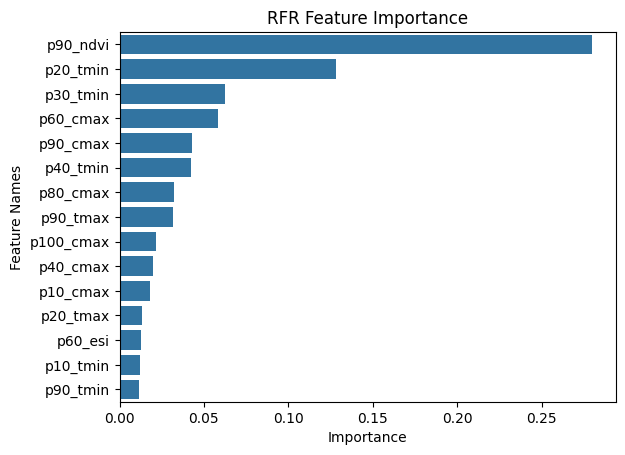

In [11]:
# Visualize feature importance results for random forest model
ax =seaborn.barplot(x="Importance", y='Feature Names', orient = 'h',data=fid[:15])
plt.title('RFR Feature Importance')
plt.show()

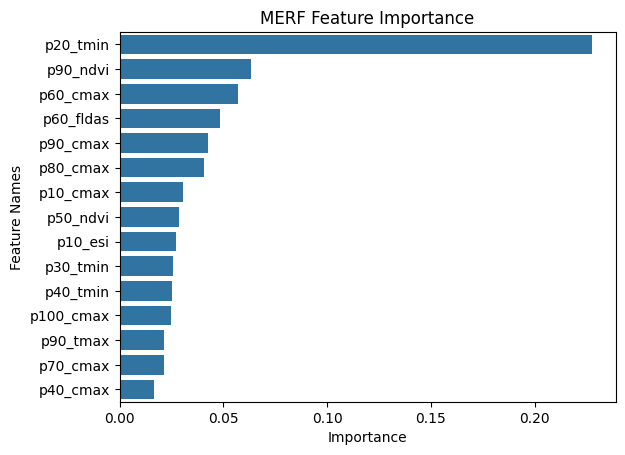

In [12]:
# Visualize feature importance results for MERF model
ax =seaborn.barplot(x="Importance", y='Feature Names', orient='h',data=fidm[:15])
plt.title('MERF Feature Importance')
plt.show()

# Part (b) - based on the results - choose 15 features to include in the model
- Aim for the inclusion of at least one month of each variable if doing monthly features
- if doing percentiles - try to include at least one feature of each variable type

In [4]:
selmonfn = ['ndvi_August', 'ndvi_July', 'tmax_August', 'tmin_April', 'esi_May',  'esi_June', 'esi_August','fldas_June','cmax_July','cmax_August', 'cmin_July', 'cmin_August','ndvi_June', 'cmin_May', 'fldas_July', 'fldas_August']
#from kenya_maize_dek.csv

selperfn = ['p90_ndvi','p40_tmin','p20_tmin','p10_cmin','p60_cmax','p80_cmax','p90_cmax','p30_tmin','p90_tmax','p40_fldas','p20_esi','p60_esi']

In [3]:
train_dek2 = pd.read_csv('/gpfs/data1/cmongp1/ginsburga/sp24_2/kenya_maize_dek.csv')

# Part (c): running models with percentiles for all models

In [ ]:
#subseasonal predictions for RF and XGB model
months = ['March','April','May','June','July','August'] #months of growing season
months = [3,4,5,6,7,8]
from machinelearns5 import input_extraction
from machinelearns5 import machinelearn as ml
dek_full = train_dek2.dropna()

xy = {}
stat_mon = pd.DataFrame()
years = np.arange(2001,2017,1,dtype=int)
for y in years: #loop to get f_int in dataframe
    #define class
    #dek = input_extraction(feature_names1,'yes')
    ml_per = ml(dek_full, selperfn)
    #set maker- create your own test train splits
    train, test, xy, fn_p = ml_per.set_maker(ml_per.inputdf, 'year', y, selperfn, ts=0.2, p='n')
    
    #Dont need to seperate out a test set because we will just be using 2019 data
    #run rfr model 
    rfrdata, fir = ml_per.rfrmodel(test, xy, 81)
    rfrstats = ml_per.stat_array(rfrdata)
    
    
    #run xgb model
    xgbdata = ml_per.xgbreg(train, test,xy)
    xgbstats = ml_per.stat_array(xgbdata)
 
    mlrun = pd.concat([rfrstats, xgbstats]) # merfstats
    stat_mon = pd.concat([stat_mon,mlrun],axis=0)


In [ ]:
train_dek = train_dek2.dropna()
ml_per = ml(train_dek, selperfn)

xy = {}
xy['X'] = train_dek[selperfn].dropna().values #convert features into numpy array
xy['y'] = train_dek['yield'].dropna().values #convert into numpy array 
stat_monx = pd.DataFrame()
for m in months: #loop to get f_int in dataframe
    #define class
    test_dek = input_extraction(feature_names1,'yes',m)
    test_dekd = test_dek.drop_duplicates(inplace=False)
    for i in test_dekd.columns:
        if i.find("ndvi") == 4:
            test_dekd[i] = test_dekd[i]/10000
        else:
            pass
    xy['X_test'] = test_dekd[selperfn].dropna().values
    xy['y_test'] = test_dekd['yield'].dropna().values  
    #Dont need to seperate out a test set because we will just be using 2019 data
    
    #run merf model
    merfdata, fim = ml_per.merfmodel(train_dek, test_dekd, xy, 75)
    merfstats = ml_per.stat_array(merfdata)
 
    mlrun = pd.concat([merfstats]) # merfstats
    mlrun['month'] = m
    stat_mon = pd.concat([stat_monx,mlrun],axis=0)

# Part (d): running models at monthly intervals to create subseasonal predictions

In [ ]:
#subseasonal predictions for RF and MERF model
months = ['March','April','May','June','July','August'] #months of growing season
months = [3,4,5,6,7,8]
from machinelearns4 import input_extraction
from machinelearns4 import machinelearn as ml
train_dek = train_dek2.dropna()
ml_per = ml(train_dek, selperfn)

xy = {}
xy['X'] = train_dek[selperfn].dropna().values #convert features into numpy array
xy['y'] = train_dek['yield'].dropna().values #convert into numpy array 
stat_mon = pd.DataFrame()
for m in months: #loop to get f_int in dataframe
    #define class
    test_dek = input_extraction(feature_names1,'yes',m)
    test_dekd = test_dek.drop_duplicates(inplace=False)
    for i in test_dekd.columns:
        if i.find("ndvi") == 4:
            test_dekd[i] = test_dekd[i]/10000
        else:
            pass
    xy['X_test'] = test_dekd[selperfn].dropna().values
    xy['y_test'] = test_dekd['yield'].dropna().values  
    #Dont need to seperate out a test set because we will just be using 2019 data
    #run rfr model 
    rfrdata, fir = ml_per.rfrmodel(test_dekd, xy, 81)
    rfrstats = ml_per.stat_array(rfrdata)
    
    #run merf model
    merfdata, fim = ml_per.merfmodel(train_dek, test_dekd, xy, 75)
    merfstats = ml_per.stat_array(merfdata)
    
    
    #run xgb model
    #xgbdata = ml_per.xgbreg(train_dek, test_dek,xy)
    #xgbstats = ml_per.stat_array(xgbdata)
 
    mlrun = pd.concat([rfrstats, merfstats]) # merfstats
    mlrun['month'] = m
    stat_mon = pd.concat([stat_mon,mlrun],axis=0)

In [ ]:
#subseasonal predictions for xgb percentiles - models are in separate routes due to long runtimes of merf and xgb models
months = [3,4,5,6,7,8]
from machinelearns4 import input_extraction
from machinelearns4 import machinelearn as ml
train_dek = train_dek2.dropna()
ml_per = ml(train_dek, selperfn)
#train, test, xy, fn_p = ml_class.set_maker(ml_class.inputdf, 'year', y, selmonfn, ts=0.2, p='n')
xy = {}
xy['X'] = train_dek[selperfn].dropna().values #convert features into numpy array
xy['y'] = train_dek['yield'].dropna().values #convert into numpy array 
stat_monx = pd.DataFrame()
for m in months: #loop to get f_int in dataframe
    #define class
    test_dek = input_extraction(feature_names1,'yes',m)
    test_dekd = test_dek.drop_duplicates(inplace=False)
    for i in test_dekd.columns:
        if i.find("ndvi") == 4:
            test_dekd[i] = test_dekd[i]/10000
        else:
            pass
    xy['X_test'] = test_dekd[selperfn].dropna().values
    xy['y_test'] = test_dekd['yield'].dropna().values  
    #Dont need to seperate out a test set because we will just be using 2019 data
    
    #run xgb model
    xgbdata = ml_per.xgbreg(train_dek, test_dek,xy)
    xgbstats = ml_per.stat_array(xgbdata)
 
    mlrun = pd.concat([xgbstats]) # merfstats
    mlrun['month'] = m
    stat_monx = pd.concat([stat_monx,mlrun],axis=0)

In [ ]:
xgb = pd.read_csv('results_xgb_2019.csv')
full  = pd.concat([stat_mon,stat_monx]) #concat statistics from separate runs of models
full

In [ ]:
full.to_csv('results_ss_20191.csv')